In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import matplotlib.pyplot as plt

%matplotlib inline

In [57]:
def visualize_roc_auc_curve(model, model_name):
    pred_prob = model.predict_proba(X_test)
    fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)

    random_probs = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)  # tpr = fpr

    score = roc_auc_score(y_test, pred_prob[:,1])
    print("ROC AUC Score:", score)

    plt.figure(figsize=(10,8))
    plt.plot(fpr, tpr, linestyle='--',color='orange')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

    plt.title(f'{model_name} ROC curve', size=15)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.show()

In [58]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
df.shape

(891, 12)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [61]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [62]:
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [63]:
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode().values[0], inplace=True)

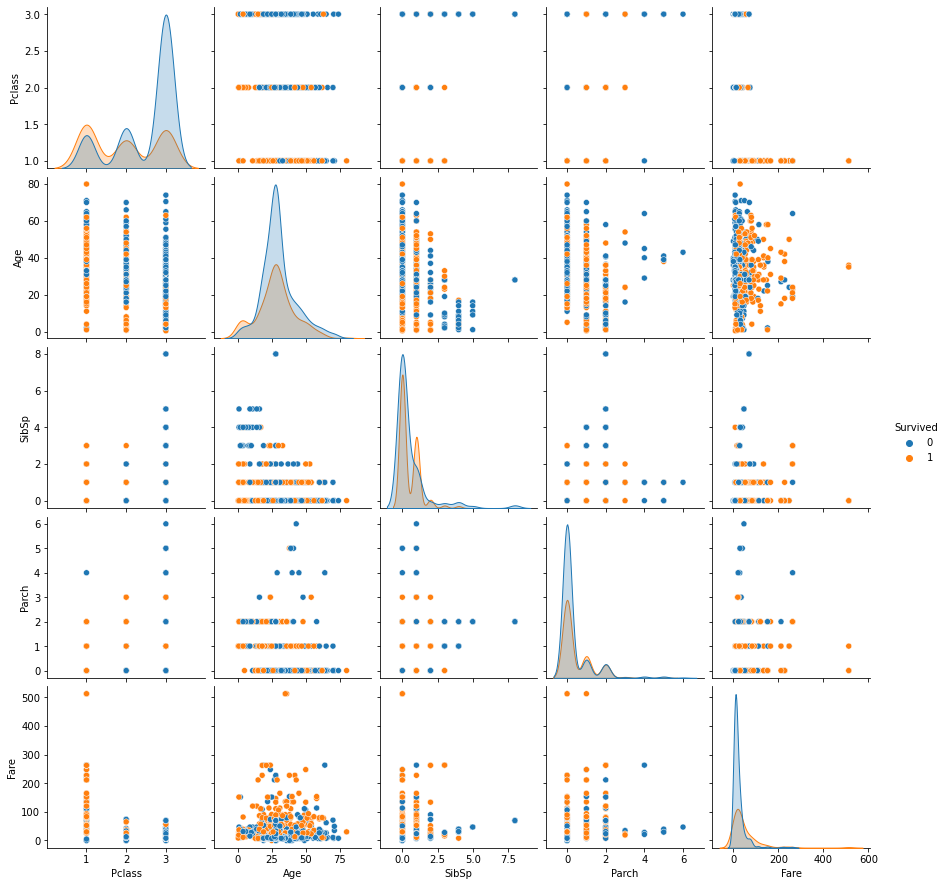

In [64]:
sns.pairplot(df, hue = "Survived")

In [65]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [82]:
X = pd.get_dummies(X, columns=["Embarked", "Sex"])

KeyError: "None of [Index(['Embarked', 'Sex'], dtype='object')] are in the [columns]"

In [73]:
scaler = StandardScaler()
X[["Age", "Fare"]] = scaler.fit_transform(X[["Age", "Fare"]])

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [75]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
predictions = gbc.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

Accuracy Score: 0.8022388059701493


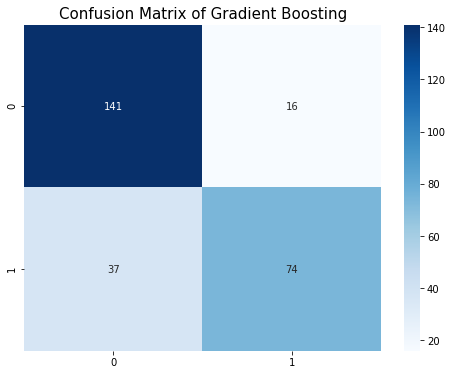

In [76]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix of Gradient Boosting", size=15)
plt.show()

ROC AUC Score: 0.8667297871119528


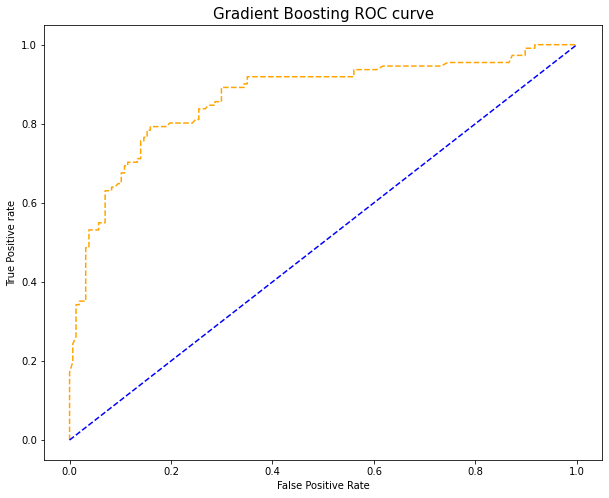

In [77]:
visualize_roc_auc_curve(gbc, "Gradient Boosting")

In [78]:
gbc.feature_importances_

array([0.14825455, 0.14243226, 0.05376189, 0.00676534, 0.16684304,
       0.01124716, 0.00640345, 0.01831613, 0.15495581, 0.29102037])

In [29]:
pip install shap

     |████████████████████████████████| 436 kB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 6.8 MB/s  eta 0:00:01
  Attempting uninstall: packaging
    Found existing installation: packaging 20.4
    Uninstalling packaging-20.4:
      Successfully uninstalled packaging-20.4
Note: you may need to restart the kernel to use updated packages.


In [83]:
import shap

In [84]:
explainer = shap.TreeExplainer(gbc)

In [85]:
shap_values = explainer.shap_values(X)

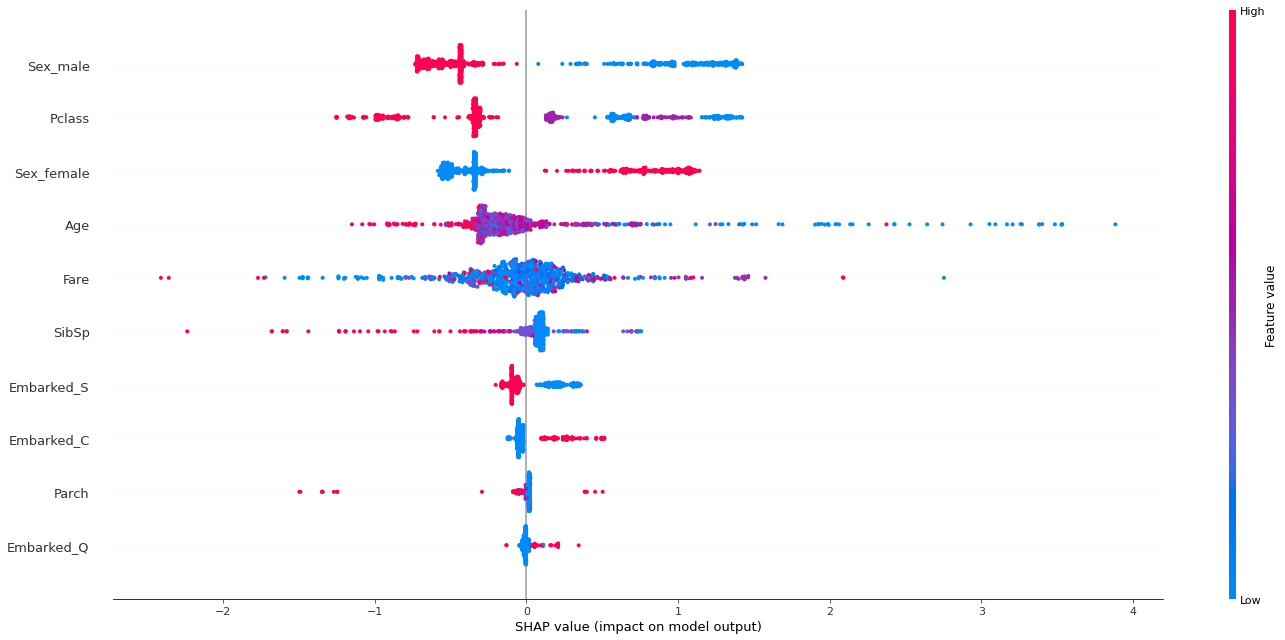

In [86]:
shap.initjs()
shap.summary_plot(shap_values, X, plot_size=(20,9))

1. Пожилые люди умирали чаще, а молодые болььше выжили
2. Выживали болььше пассажиры более "высокого класса - 1", чем ниже класс, тем выживали меьнше. Значение 1 класс здесь считается более низкимм значением, так как 1 меньше 3.
3. По полу мне не совсем понятно. Но по идее женщин выжило больше, чем мужчин.
4. Чем больше родственников было на борту, тем меньше шанс выжить.
5. Остальные признаки не имеют большого вклада.

In [88]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1,:], X.iloc[1,:])

In [89]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, features=X)